## 동대문구 행정동별 인구수와 불법 주정차 단속현황 수의 상관관계 알아보기

In [6]:
import pandas as pd

# 엑셀 파일 경로
excel_file_path = 'C:/Users/Administrator/Desktop/dayeong/동대문구_행정동별_인구수.xlsx'

# 엑셀 파일 읽기
df = pd.read_excel(excel_file_path)

# 컬럼 이름 출력
print(df.columns)

Index(['동대문구', 'Unnamed: 1', '계'], dtype='object')


In [9]:
import pandas as pd

# pandas 가 엑셀파일 읽기 위해서는 pip install openpyxl 설치 필요

# 엑셀 파일 경로
excel_file_path = 'C:/Users/Administrator/Desktop/dayeong/동대문구_행정동별_인구수.xlsx'
csv_file_path = 'C:/Users/Administrator/Desktop/dayeong/동대문구_행정동별_인구수.csv'

# 엑셀 파일 읽기
df = pd.read_excel(excel_file_path)

# 컬럼 이름 출력하여 확인
print(df.columns)

# 필요한 컬럼만 추출 (컬럼 이름을 실제 엑셀 파일의 이름으로 교체)
df_selected = df[['동대문구', '계']]

# '인구수-계' 컬럼의 숫자에 포함된 쉼표 제거 및 숫자로 변환
df_selected['계'] = df_selected['계'].str.replace(',', '').astype(int)

# CSV 파일로 저장
df_selected.to_csv(csv_file_path, index=False, encoding='utf-8-sig')

print(f"CSV 파일로 저장되었습니다: {csv_file_path}")

Index(['동대문구', 'Unnamed: 1', '계'], dtype='object')
CSV 파일로 저장되었습니다: C:/Users/Administrator/Desktop/dayeong/동대문구_행정동별_인구수.csv


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2840\2707620161.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['계'] = df_selected['계'].str.replace(',', '').astype(int)


In [11]:
# 동네 이름의 숫자 앞에 '제'라는 글자 없애버리기

import pandas as pd

# 데이터 불러오기
data = pd.read_csv('C:/Users/Administrator/Desktop/dayeong/동대문구_행정동별_인구수.csv')

# '동대문구' 컬럼 처리
data['동대문구'] = data['동대문구'].apply(lambda x: x.replace('제', '') if any(char.isdigit() for char in x) else x)

# 결과 출력
print(data)

     동대문구      계
0     용신동  38609
1     제기동  22961
2    전농1동  32941
3    전농2동  17832
4   답십리1동  27793
5   답십리2동  27394
6    장안1동  37441
7    장안2동  32647
8    청량리동  18714
9     회기동  10406
10   휘경1동  13789
11   휘경2동  24339
12   이문1동  17855
13   이문2동  19260


In [17]:
data.to_csv('C:/Users/Administrator/Desktop/dayeong/동대문구_행정동별_인구수.csv', index=False, encoding='utf-8-sig')

data

,동대문구,계
0,용신동,38609
1,제기동,22961
2,전농1동,32941
3,전농2동,17832
4,답십리1동,27793
5,답십리2동,27394
6,장안1동,37441
7,장안2동,32647
8,청량리동,18714
9,회기동,10406


## 상관관계 알아내고싶은 데이터셋 선언

In [ ]:
import pandas as pd

# 행정동별 인구수 데이터 불러오기
population_data = pd.read_csv('C:/Users/Administrator/Desktop/dayeong/동대문구_행정동별_인구수.csv')

# 불법주정차 신고현황 데이터 불러오기
parking_data = pd.read_csv('C:/Users/Administrator/Desktop/dayeong/불법주정차_신고현황_동대문구_filtered.csv')

## 상관계수

In [13]:
# '도로명주소' 컬럼에서 동네 정보 추출
parking_data['동네'] = parking_data['도로명주소'].apply(lambda x: x.split()[-3] if len(x.split()) > 2 else None)

# 행정동별 불법주정차 신고 건수 계산
parking_counts = parking_data.groupby('동네').size().reset_index(name='불법주정차_신고건수')

# 행정동별 인구수와 불법주정차 신고 건수 데이터 병합
merged_data = pd.merge(population_data, parking_counts, left_on='동대문구', right_on='동네', how='inner')

# 상관관계 계산
correlation = merged_data['계'].corr(merged_data['불법주정차_신고건수'])

print("행정동별 인구수와 불법주정차 신고건수 간의 상관관계:", correlation)

행정동별 인구수와 불법주정차 신고건수 간의 상관관계: 0.6500553985372012


## 시각화

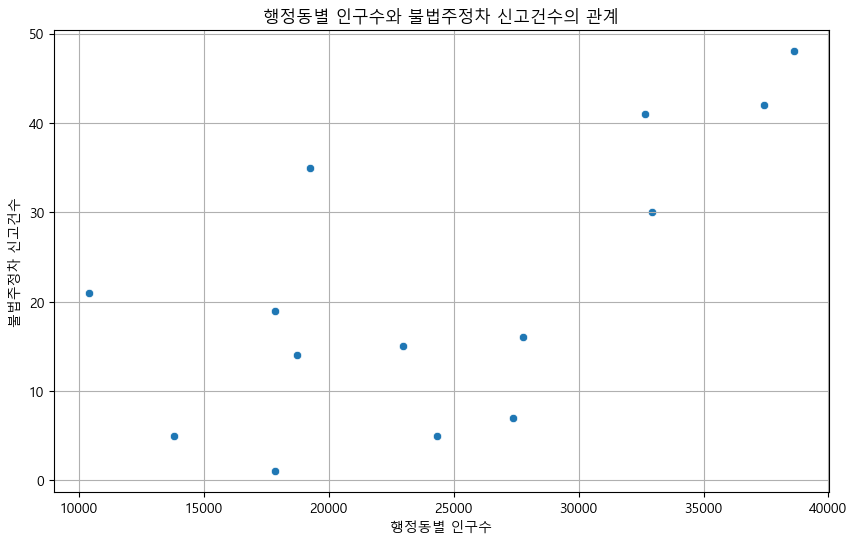

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고 있는 OS에 맞는 한글 폰트 경로 설정
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


# '도로명주소' 컬럼에서 동네 정보 추출
parking_data['동네'] = parking_data['도로명주소'].apply(lambda x: x.split()[-3] if len(x.split()) > 2 else None)

# 행정동별 불법주정차 신고 건수 계산
parking_counts = parking_data.groupby('동네').size().reset_index(name='불법주정차_신고건수')

# 행정동별 인구수와 불법주정차 신고 건수 데이터 병합
merged_data = pd.merge(population_data, parking_counts, left_on='동대문구', right_on='동네', how='inner')

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='계', y='불법주정차_신고건수')
plt.title('행정동별 인구수와 불법주정차 신고건수의 관계')
plt.xlabel('행정동별 인구수')
plt.ylabel('불법주정차 신고건수')
plt.grid(True)
plt.show()

## 산점도

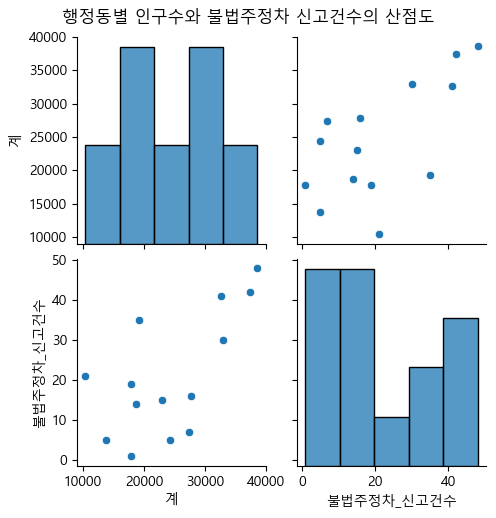

In [21]:
# '도로명주소' 컬럼에서 동네 정보 추출
parking_data['동네'] = parking_data['도로명주소'].apply(lambda x: x.split()[-3] if len(x.split()) > 2 else None)

# 행정동별 불법주정차 신고 건수 계산
parking_counts = parking_data.groupby('동네').size().reset_index(name='불법주정차_신고건수')

# 행정동별 인구수와 불법주정차 신고 건수 데이터 병합
merged_data = pd.merge(population_data, parking_counts, left_on='동대문구', right_on='동네', how='inner')

# 산점도 그리기
sns.pairplot(merged_data, vars=['계', '불법주정차_신고건수'])
plt.suptitle('행정동별 인구수와 불법주정차 신고건수의 산점도', y=1.02)
plt.show()

## 선형회귀분석

In [22]:
import statsmodels.api as sm

# '도로명주소' 컬럼에서 동네 정보 추출
parking_data['동네'] = parking_data['도로명주소'].apply(lambda x: x.split()[-3] if len(x.split()) > 2 else None)

# 행정동별 불법주정차 신고 건수 계산
parking_counts = parking_data.groupby('동네').size().reset_index(name='불법주정차_신고건수')

# 행정동별 인구수와 불법주정차 신고 건수 데이터 병합
merged_data = pd.merge(population_data, parking_counts, left_on='동대문구', right_on='동네', how='inner')

# 선형 회귀 모델 적합
X = merged_data['계']  # 독립 변수: 행정동별 인구수
y = merged_data['불법주정차_신고건수']  # 종속 변수: 불법주정차 신고건수
X = sm.add_constant(X)  # 절편을 위한 상수항 추가

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


results.summary()

                            OLS Regression Results                            
Dep. Variable:             불법주정차_신고건수   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     8.782
Date:                Sun, 02 Jun 2024   Prob (F-statistic):             0.0118
Time:                        21:01:04   Log-Likelihood:                -53.747
No. Observations:                  14   AIC:                             111.5
Df Residuals:                      12   BIC:                             112.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6122      9.981     -0.662      0.5

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             불법주정차_신고건수   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     8.782
Date:                Sun, 02 Jun 2024   Prob (F-statistic):             0.0118
Time:                        21:01:04   Log-Likelihood:                -53.747
No. Observations:                  14   AIC:                             111.5
Df Residuals:                      12   BIC:                             112.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6122      9.981     -0.662      0.520     -28.359      15.135
계              0.0011      0.000      2.963      0.012       0.000       0.002
==============================================================================
Omnibus:                        0.855   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.652   Jarque-Bera (JB):                0.655
Skew:                           0.046   Prob(JB):                        0.721
Kurtosis:                       1.944   Cond. No.                     7.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""